In [ ]:
# Linear regression: r2 = 0.75283, adjusted_R = 0.7497040948438123
# polynomial regression d = 3: r2 = 0.82, adj_r2 = 0.79

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
import seaborn as sns
%matplotlib inline

# Fitting MLR Model

In [3]:
mtcars = pd.read_csv(r"D:\DS-Batch1\DS dataset\mtcars.csv")
print(mtcars.columns)
# Drop the target variable
X_features = mtcars.drop(['mpg'], axis=1)
X_features.head()

Index(['mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear',
       'carb'],
      dtype='object')


,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [4]:
X_features.shape

(32, 10)

In [4]:
X_features.dtypes

cyl       int64
disp    float64
hp        int64
drat    float64
wt      float64
qsec    float64
vs        int64
am        int64
gear      int64
carb      int64
dtype: object

In [5]:
X_features.isnull().sum()

cyl     0
disp    0
hp      0
drat    0
wt      0
qsec    0
vs      0
am      0
gear    0
carb    0
dtype: int64

In [7]:
# # Add constant intercept term 1 to dataset
X = sm.add_constant(X_features)
# print(X.head())
# X.head()
y = mtcars['mpg']
# print(y.head())

In [8]:
# # Split data into trian and test
train_X, test_X,train_y,test_y = train_test_split(X,y, test_size= 0.2, random_state=15)
print(len(mtcars))
print(train_X.shape, test_X.shape)
print(train_y.shape, test_y.shape)

32
(25, 11) (7, 11)
(25,) (7,)


In [9]:
# # Fit the regression model, ols->ordinary least squares method
mlr_model = sm.OLS(train_y, train_X).fit()
mlr_model.rsquared,mlr_model.rsquared_adj

(0.8859820881150764, 0.8045407224829881)

In [10]:
# checking the summary of model.
mlr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     10.88
Date:                Thu, 26 Sep 2024   Prob (F-statistic):           5.44e-05
Time:                        12:28:28   Log-Likelihood:                -49.980
No. Observations:                  25   AIC:                             122.0
Df Residuals:                      14   BIC:                             135.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.1009     19.649      1.685      0.114      -9.042      75.243
cyl           -0.8980      1.135     -0.791      0.442      -3.331       1.535
disp          -0.0005      0.021     -0.022      0.983      -0.045       0.044
hp            -0.0088      0.024     -0.363      0.722      -0.061       0.043
drat          -0.9633      1.950     -0.494      0.629      -5.146       3.220
wt            -3.6281      2.149     -1.688      0.114      -8.237       0.981
qsec           0.3393      0.732      0.464      0.650      -1.230       1.909
vs            -0.4980      2.013     -0.247      0.808      -4.816       3.820
am             0.1620      2.128      0.076      0.940      -4.402       4.726
gear           0.8841      1.654      0.535      0.601      -2.663       4.431
carb          -0.1818      0.891     -0.204      0.841      -2.094       1.730
==============================================================================
Omnibus:                       10.978   Durbin-Watson:                   1.772
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               10.080
Skew:                           1.090   Prob(JB):                      0.00647
Kurtosis:                       5.219   Cond. No.                     1.22e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.22e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
1. Co-efficient of Determination (R-Square) and Adjusted R-Square:
    
Observation: For our model , the R-square value is 0.8455 and the adjusted R-square value is 0.735.
This shows that the model explains 78.6% of the variation in dependent variable.


After Dignosis:
Features removed: Cyl, disp,hp, drat.
the R-square value is 0.859 and the adjusted R-square value is 0.82
This shows that the model explains 82.1% of the variation in dependent variable.

In [9]:
sns.__version__

'0.12.2'

<!-- # Checking for multicollinearity -->

In [11]:
# correlaton metrix
corr = X_features.corr()
print(corr)

           cyl      disp        hp      drat        wt      qsec        vs  \
cyl   1.000000  0.902033  0.832447 -0.699938  0.782496 -0.591242 -0.810812   
disp  0.902033  1.000000  0.790949 -0.710214  0.887980 -0.433698 -0.710416   
hp    0.832447  0.790949  1.000000 -0.448759  0.658748 -0.708223 -0.723097   
drat -0.699938 -0.710214 -0.448759  1.000000 -0.712441  0.091205  0.440278   
wt    0.782496  0.887980  0.658748 -0.712441  1.000000 -0.174716 -0.554916   
qsec -0.591242 -0.433698 -0.708223  0.091205 -0.174716  1.000000  0.744535   
vs   -0.810812 -0.710416 -0.723097  0.440278 -0.554916  0.744535  1.000000   
am   -0.522607 -0.591227 -0.243204  0.712711 -0.692495 -0.229861  0.168345   
gear -0.492687 -0.555569 -0.125704  0.699610 -0.583287 -0.212682  0.206023   
carb  0.526988  0.394977  0.749812 -0.090790  0.427606 -0.656249 -0.569607   

            am      gear      carb  
cyl  -0.522607 -0.492687  0.526988  
disp -0.591227 -0.555569  0.394977  
hp   -0.243204 -0.125704  0.74

<Axes: >

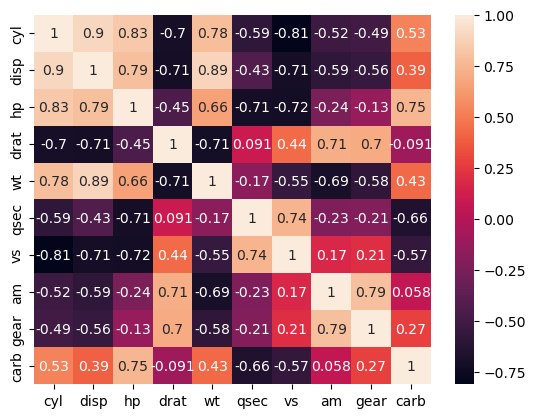

In [12]:
# heatmap for correlation
sns.heatmap(corr,annot=True)

In [15]:
# Vif calculator for features.
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
    vif = pd.DataFrame()
    vif["Variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

In [16]:
# for the shape x (32,11)
calc_vif(X)

,Variables,VIF
0,const,1596.273030
1,cyl,15.373833
2,disp,21.620241
3,hp,9.832037
4,drat,3.374620
5,wt,15.164887
6,qsec,7.527958
7,vs,4.965873
8,am,4.648487
9,gear,5.357452


In [11]:
# for the shape x(25,11)
calc_vif(train_X)

,Variables,VIF
0,const,1693.517549
1,cyl,16.840809
2,disp,21.075565
3,hp,12.015187
4,drat,3.889270
5,wt,12.453089
6,qsec,7.820345
7,vs,4.380802
8,am,4.766868
9,gear,6.257250


# Choosing < 10  VIF values feature

In [17]:
X_new = X.drop(['cyl','disp'],axis = 1)
X_new

,const,hp,drat,wt,qsec,vs,am,gear,carb
0,1.0,110,3.90,2.620,16.46,0,1,4,4
1,1.0,110,3.90,2.875,17.02,0,1,4,4
2,1.0,93,3.85,2.320,18.61,1,1,4,1
3,1.0,110,3.08,3.215,19.44,1,0,3,1
4,1.0,175,3.15,3.440,17.02,0,0,3,2
5,1.0,105,2.76,3.460,20.22,1,0,3,1
6,1.0,245,3.21,3.570,15.84,0,0,3,4
7,1.0,62,3.69,3.190,20.00,1,0,4,2
8,1.0,95,3.92,3.150,22.90,1,0,4,2
9,1.0,123,3.92,3.440,18.30,1,0,4,4


In [19]:
calc_vif(X_new)

,Variables,VIF
0,const,806.789090
1,hp,6.015788
2,drat,3.111501
3,wt,6.051127
4,qsec,5.918682
5,vs,4.270956
6,am,4.285815
7,gear,4.690187
8,carb,4.290468


In [20]:
X_train_new = train_X.drop(['cyl','disp','hp'],axis = 1)
X_train_new

,const,drat,wt,qsec,vs,am,gear,carb
1,1.0,3.90,2.875,17.02,0,1,4,4
2,1.0,3.85,2.320,18.61,1,1,4,1
31,1.0,4.11,2.780,18.60,1,1,4,2
6,1.0,3.21,3.570,15.84,0,0,3,4
3,1.0,3.08,3.215,19.44,1,0,3,1
28,1.0,4.22,3.170,14.50,0,1,5,4
25,1.0,4.08,1.935,18.90,1,1,4,1
9,1.0,3.92,3.440,18.30,1,0,4,4
4,1.0,3.15,3.440,17.02,0,0,3,2
27,1.0,3.77,1.513,16.90,1,1,5,2


In [21]:
calc_vif(X_train_new)

,Variables,VIF
0,const,491.176827
1,drat,3.179202
2,wt,5.137865
3,qsec,3.845702
4,vs,3.423125
5,am,3.969706
6,gear,5.312078
7,carb,3.746348


In [23]:
# # Fit the regression model
mlr_model_2 = sm.OLS(train_y, X_train_new).fit()
print('MLR_model:',mlr_model.rsquared)
print('MLR_model:',mlr_model.rsquared_adj)
print('MLR_MODEL_2:',mlr_model_2.rsquared)
print('MLR_MODEL_2:',mlr_model_2.rsquared_adj)

MLR_model: 0.8859820881150764
MLR_model: 0.8045407224829881
MLR_MODEL_2: 0.8736331586717505
MLR_MODEL_2: 0.8215997534189419


In [21]:
mlr_model_train.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     16.79
Date:                Tue, 20 Aug 2024   Prob (F-statistic):           1.72e-06
Time:                        20:05:09   Log-Likelihood:                -51.265
No. Observations:                  25   AIC:                             118.5
Df Residuals:                      17   BIC:                             128.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.7532     10.110      1.459      0.163      -6.576      36.082
drat          -0.0058      1.685     -0.003      0.997      -3.560       3.548
wt            -4.3662      1.319     -3.311      0.004      -7.149      -1.584
qsec           0.8948      0.490      1.825      0.086      -0.140       1.929
vs            -0.0189      1.700     -0.011      0.991      -3.606       3.568
am             0.8373      1.855      0.451      0.657      -3.077       4.751
gear           1.0402      1.456      0.715      0.485      -2.031       4.111
carb          -0.4220      0.570     -0.741      0.469      -1.624       0.780
==============================================================================
Omnibus:                        3.374   Durbin-Watson:                   1.783
Prob(Omnibus):                  0.185   Jarque-Bera (JB):                1.917
Skew:                           0.638   Prob(JB):                        0.383
Kurtosis:                       3.463   Cond. No.                         426.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Residual Analysis

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


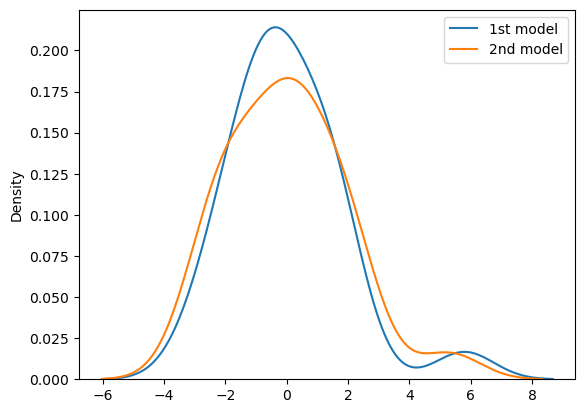

In [24]:
# extracting residuals values for both models.
Residual1 = mlr_model.resid
Residual2 = mlr_model_2.resid
# KDE plots
sns.kdeplot(Residual1,label = '1st model')
sns.kdeplot(Residual2,label = '2nd model')
plt.legend()
plt.show()

## QQ plot

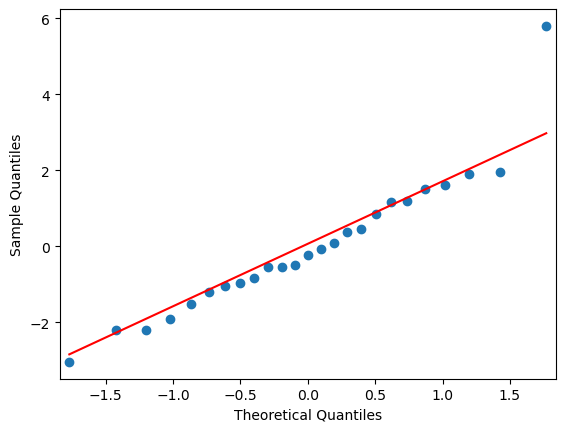

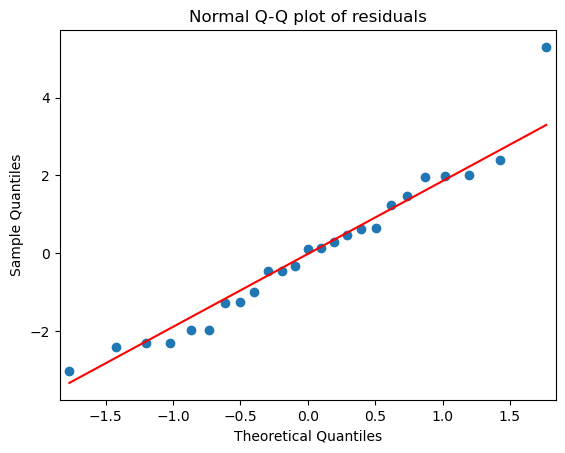

In [25]:
qqplot=sm.qqplot(Residual1, line='q')
qqplot =sm.qqplot(Residual2,line='q') 
plt.title("Normal Q-Q plot of residuals")
plt.show()

# pp plot

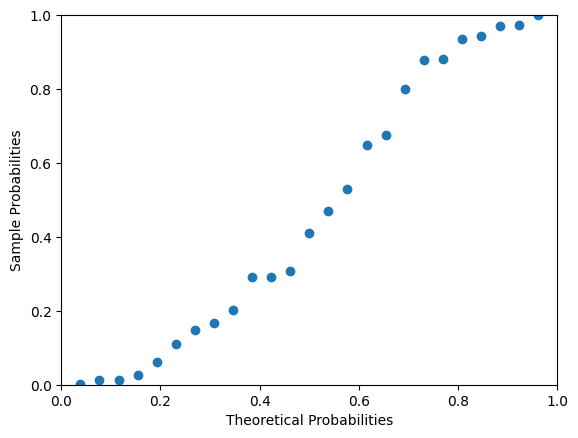

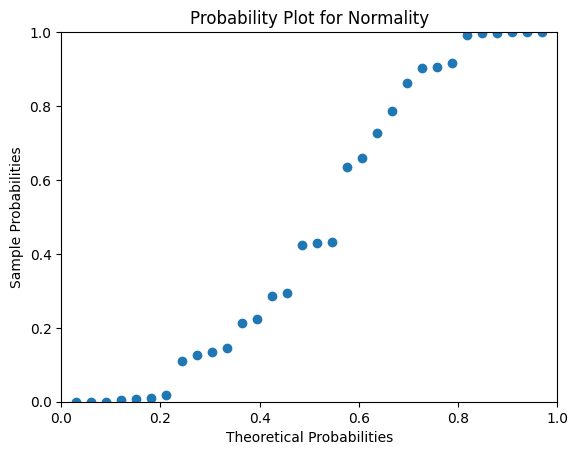

In [19]:
pplot=sm.ProbPlot(Residual1)
pplot1=sm.ProbPlot(Residual2)
fig = pplot.ppplot()
fig = pplot1.ppplot()
plt.title("Probability Plot for Normality")
plt.show()

# Residual plot

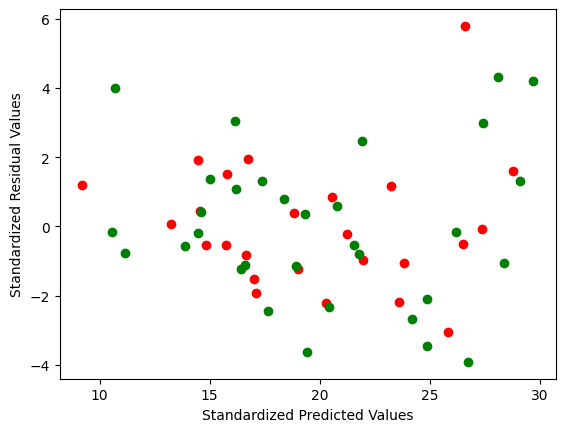

In [20]:
plt.scatter(mlr_model.fittedvalues, mlr_model.resid,c= 'r')
plt.scatter(mlr_model_2.fittedvalues, mlr_model_2.resid,c = 'g')
plt.xlabel("Standardized Predicted Values")
plt.ylabel("Standardized Residual Values")
plt.show()

In [21]:
X_new

,const,drat,wt,qsec,vs,am,gear,carb
0,1.0,3.90,2.620,16.46,0,1,4,4
1,1.0,3.90,2.875,17.02,0,1,4,4
2,1.0,3.85,2.320,18.61,1,1,4,1
3,1.0,3.08,3.215,19.44,1,0,3,1
4,1.0,3.15,3.440,17.02,0,0,3,2
5,1.0,2.76,3.460,20.22,1,0,3,1
6,1.0,3.21,3.570,15.84,0,0,3,4
7,1.0,3.69,3.190,20.00,1,0,4,2
8,1.0,3.92,3.150,22.90,1,0,4,2
9,1.0,3.92,3.440,18.30,1,0,4,4


# Data transformation


In [26]:
# Transformation of data via standerdization method
def standardized_values(vals):
    return (vals - vals.mean())/vals.std()

In [27]:
X_standr = standardized_values(X_new)
print(X_standr)

    const        hp      drat        wt      qsec        vs        am  \
0     NaN -0.535093  0.567514 -0.610400 -0.777165 -0.868028  1.189901   
1     NaN -0.535093  0.567514 -0.349785 -0.463781 -0.868028  1.189901   
2     NaN -0.783040  0.474000 -0.917005  0.426007  1.116036  1.189901   
3     NaN -0.535093 -0.966118 -0.002300  0.890487  1.116036 -0.814143   
4     NaN  0.412942 -0.835198  0.227654 -0.463781 -0.868028 -0.814143   
5     NaN -0.608019 -1.564608  0.248095  1.326987  1.116036 -0.814143   
6     NaN  1.433903 -0.722981  0.360516 -1.124126 -0.868028 -0.814143   
7     NaN -1.235180  0.174754 -0.027850  1.203871  1.116036 -0.814143   
8     NaN -0.753870  0.604919 -0.068731  2.826755  1.116036 -0.814143   
9     NaN -0.345486  0.604919  0.227654  0.252526  1.116036 -0.814143   
10    NaN -0.345486  0.604919  0.227654  0.588295  1.116036 -0.814143   
11    NaN  0.485868 -0.984820  0.871525 -0.251127 -0.868028 -0.814143   
12    NaN  0.485868 -0.984820  0.524039 -0.139204 -

In [28]:
X_standr.describe()

,const,hp,drat,wt,qsec,vs,am,gear,carb
count,0.0,3.200000e+01,3.200000e+01,3.200000e+01,3.200000e+01,32.000000,3.200000e+01,3.200000e+01,3.200000e+01
mean,NaN,2.775558e-17,-2.775558e-16,-3.608225e-16,-1.443290e-15,0.000000,5.551115e-17,-2.775558e-17,2.775558e-17
std,NaN,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00
min,NaN,-1.381032e+00,-1.564608e+00,-1.741772e+00,-1.874010e+00,-0.868028,-8.141431e-01,-9.318192e-01,-1.122152e+00
25%,NaN,-7.319924e-01,-9.661175e-01,-6.500027e-01,-5.351317e-01,-0.868028,-8.141431e-01,-9.318192e-01,-5.030337e-01
50%,NaN,-3.454858e-01,1.841059e-01,1.101223e-01,-7.764656e-02,-0.868028,-8.141431e-01,4.235542e-01,-5.030337e-01
75%,NaN,4.858679e-01,6.049193e-01,4.013971e-01,5.882951e-01,1.116036,1.189901e+00,4.235542e-01,7.352031e-01
max,NaN,2.746567e+00,2.493904e+00,2.255336e+00,2.826755e+00,1.116036,1.189901e+00,1.778928e+00,3.211677e+00


In [29]:
X_standr = X_standr.drop(['const'],axis = 1)

In [30]:
X_standr = sm.add_constant(X_standr)
# print(X_standr)
y_stdndr = standardized_values(y)
# y_stdndr

In [31]:
# # Fit the regression model
mlr_model_3 = sm.OLS(y_stdndr, X_standr).fit()
print('MLR_model_3:',mlr_model_3.rsquared)
print('MLR_model_3:',mlr_model_3.rsquared_adj)
print('MLR_MODEL_2:',mlr_model_2.rsquared)

MLR_model_3: 0.8654805568985171
MLR_model_3: 0.8186911853849579
MLR_MODEL_2: 0.8736331586717505


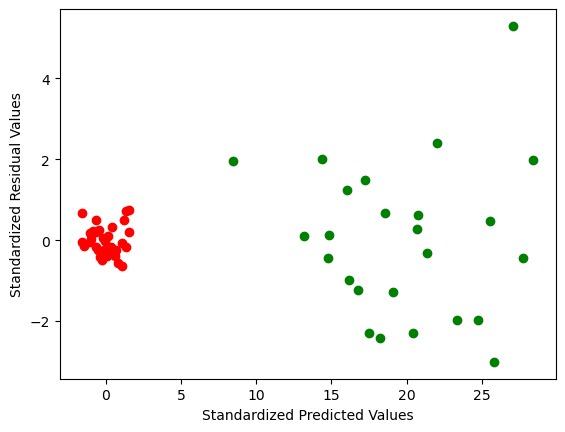

In [32]:
plt.scatter(mlr_model_3.fittedvalues, mlr_model_3.resid,c= 'r')
plt.scatter(mlr_model_2.fittedvalues, mlr_model_2.resid,c = 'g')
plt.xlabel("Standardized Predicted Values")
plt.ylabel("Standardized Residual Values")
plt.show()

# Outlier Analysis:

In [34]:
sm_model = sm.regression.linear_model.OLS(y_stdndr, X_standr).fit()
influence = sm_model.get_influence()
print(influence.cooks_distance)

(array([1.81201869e-02, 1.06924900e-02, 7.32925719e-02, 1.58113749e-03,
       6.85660066e-03, 4.68088736e-02, 2.61446063e-04, 3.48502452e-02,
       3.30303509e-01, 1.17463362e-03, 2.41765241e-02, 2.68796075e-03,
       3.34439936e-03, 3.18417088e-03, 6.08757464e-03, 9.28320657e-04,
       1.44347390e-01, 7.04888209e-02, 2.31030848e-02, 1.09341566e-01,
       3.74106436e-02, 1.08090861e-02, 1.87710244e-02, 1.17743504e-03,
       2.60170270e-02, 3.47568247e-03, 5.88093717e-03, 1.63271140e-01,
       3.50919915e-01, 1.19053126e-04, 1.07834681e-01, 6.85191182e-02]), array([0.99999959, 0.99999996, 0.99983361, 1.        , 0.99999999,
       0.99997477, 1.        , 0.9999929 , 0.95574258, 1.        ,
       0.99999855, 1.        , 1.        , 1.        , 1.        ,
       1.        , 0.99751106, 0.99985845, 0.99999881, 0.99915611,
       0.99999035, 0.99999996, 0.99999952, 1.        , 0.99999801,
       1.        , 1.        , 0.99603919, 0.94684421, 1.        ,
       0.99920138, 0.999874

In [35]:
influence_list = influence.cooks_distance[0]
print(influence_list)

[1.81201869e-02 1.06924900e-02 7.32925719e-02 1.58113749e-03
 6.85660066e-03 4.68088736e-02 2.61446063e-04 3.48502452e-02
 3.30303509e-01 1.17463362e-03 2.41765241e-02 2.68796075e-03
 3.34439936e-03 3.18417088e-03 6.08757464e-03 9.28320657e-04
 1.44347390e-01 7.04888209e-02 2.31030848e-02 1.09341566e-01
 3.74106436e-02 1.08090861e-02 1.87710244e-02 1.17743504e-03
 2.60170270e-02 3.47568247e-03 5.88093717e-03 1.63271140e-01
 3.50919915e-01 1.19053126e-04 1.07834681e-01 6.85191182e-02]


In [36]:
influence_df = pd.DataFrame(influence_list, columns=["influence"])
influence_df.index = X_standr.index
cooks_df = X_standr.merge(influence_df, left_index=True, right_index=True)
cooks_df

,const,hp,drat,wt,qsec,vs,am,gear,carb,influence
0,1.0,-0.535093,0.567514,-0.610400,-0.777165,-0.868028,1.189901,0.423554,0.735203,0.018120
1,1.0,-0.535093,0.567514,-0.349785,-0.463781,-0.868028,1.189901,0.423554,0.735203,0.010692
2,1.0,-0.783040,0.474000,-0.917005,0.426007,1.116036,1.189901,0.423554,-1.122152,0.073293
3,1.0,-0.535093,-0.966118,-0.002300,0.890487,1.116036,-0.814143,-0.931819,-1.122152,0.001581
4,1.0,0.412942,-0.835198,0.227654,-0.463781,-0.868028,-0.814143,-0.931819,-0.503034,0.006857
5,1.0,-0.608019,-1.564608,0.248095,1.326987,1.116036,-0.814143,-0.931819,-1.122152,0.046809
6,1.0,1.433903,-0.722981,0.360516,-1.124126,-0.868028,-0.814143,-0.931819,0.735203,0.000261
7,1.0,-1.235180,0.174754,-0.027850,1.203871,1.116036,-0.814143,0.423554,-0.503034,0.034850
8,1.0,-0.753870,0.604919,-0.068731,2.826755,1.116036,-0.814143,0.423554,-0.503034,0.330304
9,1.0,-0.345486,0.604919,0.227654,0.252526,1.116036,-0.814143,0.423554,0.735203,0.001175


In [38]:
# Setting the threshold and getting the outliers
original_length = len(X_standr)
cooks_threshold = 4 / original_length
print(cooks_threshold)

0.125


In [39]:
cooks_outliers = cooks_df[cooks_df["influence"] > cooks_threshold]
cooks_outliers.sort_values(by=["influence"])

print(cooks_outliers)
print("Removed:", len(cooks_outliers))
print(f"This is {cooks_threshold * 100}% of our dataset")

    const        hp      drat        wt      qsec        vs        am  \
8     1.0 -0.753870  0.604919 -0.068731  2.826755  1.116036 -0.814143   
16    1.0  1.215126 -0.685575  2.174596 -0.239935 -0.868028 -0.814143   
27    1.0 -0.491337  0.324377 -1.741772 -0.530935  1.116036  1.189901   
28    1.0  1.711021  1.166004 -0.048290 -1.874010 -0.868028  1.189901   

        gear      carb  influence  
8   0.423554 -0.503034   0.330304  
16 -0.931819  0.735203   0.144347  
27  1.778928 -0.503034   0.163271  
28  1.778928  0.735203   0.350920  
Removed: 4
This is 12.5% of our dataset


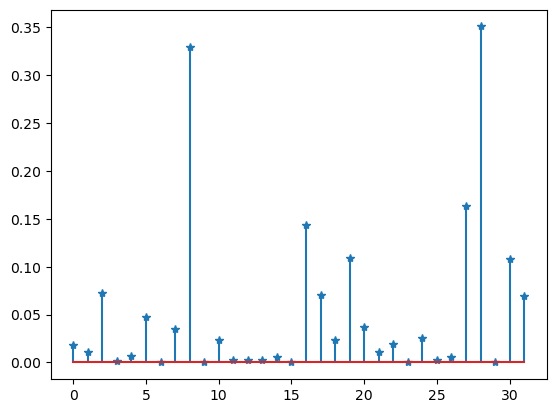

In [40]:
plt.stem(np.arange(len(X_standr)), np.round(influence_list, 3), markerfmt='*')
plt.show()

In [52]:
X_standr.shape

(32, 9)

In [46]:
leverage = 3*((8+1)/32)
print(leverage)

0.84375


# Leverage value / influvencing points

In [41]:
K = X_standr.shape[1]
n = X_standr.shape[0]
leverage_cutoff = 3*((K + 1)/n)

print( "Number of variables:", K, " and number of observations:", n)
print( "Cutoff for leverage value: ", round(leverage_cutoff, 3))

Number of variables: 9  and number of observations: 32
Cutoff for leverage value:  0.938


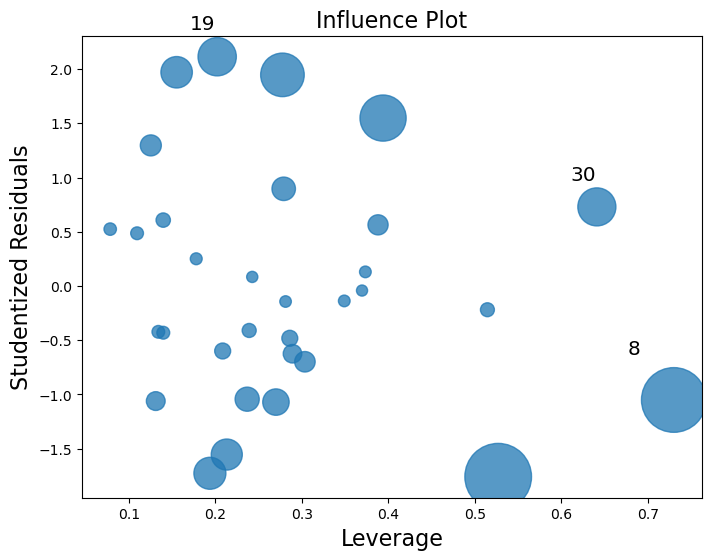

In [42]:
from statsmodels.graphics.regressionplots import influence_plot
fig, ax = plt.subplots(figsize=(8,6))
influence_plot(mlr_model_3, ax = ax )
plt.show()

In [43]:
X_standr_out = X_standr.drop(X_standr.index[[16,8,26,27]],axis=0).reset_index()

In [44]:
X_standr_out.head()

,index,const,hp,drat,wt,qsec,vs,am,gear,carb
0,0,1.0,-0.535093,0.567514,-0.610400,-0.777165,-0.868028,1.189901,0.423554,0.735203
1,1,1.0,-0.535093,0.567514,-0.349785,-0.463781,-0.868028,1.189901,0.423554,0.735203
2,2,1.0,-0.783040,0.474000,-0.917005,0.426007,1.116036,1.189901,0.423554,-1.122152
3,3,1.0,-0.535093,-0.966118,-0.002300,0.890487,1.116036,-0.814143,-0.931819,-1.122152
4,4,1.0,0.412942,-0.835198,0.227654,-0.463781,-0.868028,-0.814143,-0.931819,-0.503034


In [45]:
X_standr_out = X_standr_out.drop(['index'],axis=1)
print(len(X_standr_out))

28


In [46]:
y_stdndr_out = y_stdndr.drop(y_stdndr.index[[8,16,26,27]],axis=0).reset_index()
y_stdndr_out = y_stdndr_out.drop(['index'],axis=1)
len(y_stdndr_out)

28

In [47]:
X_standr_out.shape, y_stdndr_out.shape

((28, 9), (28, 1))

In [48]:
# X_standr_out = sm.add_constant(X_standr_out)
mlr_model_4 = sm.OLS(y_stdndr_out, X_standr_out).fit()
print(mlr_model_4.rsquared)
print(mlr_model_4.rsquared_adj)

0.8873975953898264
0.8399860566065954


In [49]:
mlr_model_4.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.840   
Dependent Variable: mpg              AIC:                34.1615 
Date:               2024-09-26 13:46 BIC:                46.1513 
No. Observations:   28               Log-Likelihood:     -8.0808 
Df Model:           8                F-statistic:        18.72   
Df Residuals:       19               Prob (F-statistic): 1.78e-07
R-squared:          0.887            Scale:              0.15368 
-------------------------------------------------------------------
           Coef.    Std.Err.      t      P>|t|     [0.025    0.975]
-------------------------------------------------------------------
const      0.0013     0.0797    0.0159   0.9875   -0.1655    0.1681
hp         0.0522     0.2132    0.2449   0.8091   -0.3941    0.4986
drat       0.1924     0.1515    1.2699   0.2195   -0.1247    0.5096
wt        -0.6519     0.2062   -3.1613   0.0051   -1.0835   -0.2203
qsec       0.6897     0.3175    2.1724   0.0427    0.0252    1.3541
vs        -0.3476     0.2410   -1.4421   0.1656   -0.8521    0.1569
am         0.0724     0.1733    0.4177   0.6809   -0.2903    0.4350
gear       0.1791     0.2194    0.8163   0.4245   -0.2801    0.6382
carb      -0.1239     0.1689   -0.7339   0.4720   -0.4774    0.2295
-----------------------------------------------------------------
Omnibus:              0.267        Durbin-Watson:           2.104
Prob(Omnibus):        0.875        Jarque-Bera (JB):        0.425
Skew:                 0.182        Prob(JB):                0.808
Kurtosis:             2.518        Condition No.:           11   
=================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the
errors is correctly specified.
"""

# Data transformation for testing data.

In [43]:
test_X = test_X.drop(['cyl','disp','hp'],axis = 1)

In [44]:
test_X.shape

(7, 8)

In [45]:
test_X = standardized_values(test_X)
test_X = test_X.drop(['const'],axis = 1)

In [46]:
test_X = sm.add_constant(test_X)
test_X

,const,drat,wt,qsec,vs,am,gear,carb
29,1.0,-0.074967,-0.346287,-1.594915,-0.801784,1.069045,1.815683,1.685671
20,1.0,0.038497,-0.544232,1.221162,1.069045,-0.801784,-0.726273,-0.996078
24,1.0,-0.840849,0.351386,-0.627083,-0.801784,-0.801784,-0.726273,-0.459728
16,1.0,-0.628104,1.324885,-0.396053,-0.801784,-0.801784,-0.726273,0.612971
14,1.0,-1.053593,1.263230,-0.046385,-0.801784,-0.801784,-0.726273,0.612971
18,1.0,1.783004,-1.095881,0.290795,1.069045,1.069045,0.544705,-0.459728
19,1.0,0.776012,-0.953101,1.152478,1.069045,1.069045,0.544705,-0.996078


In [47]:
test_y = standardized_values(test_y)
test_y.shape

(7,)

# Prediction on testing data

In [48]:
y_pred = mlr_model_4.predict(test_X)
y_pred

29   -0.352741
20    0.704730
24   -0.646953
16   -1.195945
14   -1.012927
18    1.077530
19    1.412648
dtype: float64

In [49]:
#Actual value and the predicted value
reg_model_diff = pd.DataFrame({'Actual value': test_y, 'Predicted value': y_pred, 'Diffrence': test_y-y_pred})
reg_model_diff

,Actual value,Predicted value,Diffrence
29,-0.205432,-0.352741,0.147310
20,0.012084,0.704730,-0.692646
24,-0.265853,-0.646953,0.381101
16,-0.809642,-1.195945,0.386303
14,-1.329263,-1.012927,-0.316336
18,1.087579,1.077530,0.010048
19,1.510526,1.412648,0.097878


In [50]:
sum(reg_model_diff['Diffrence']**2)

0.9056757459939924

# Evaluation metrics
Mean Absolute Error (MAE),
Mean Squared Error (MSE),
Root Mean Squared Error (RMSE),
R² (R-Squared).

In [51]:
mse = (test_y-y_pred)**2
print(f"MSE: {mse.mean():0.2f} (+/- {mse.std():0.2f})")

mae = np.abs(test_y-y_pred)
print(f"MAE: {mae.mean():0.2f} (+/- {mae.std():0.2f})")

rmse = np.sqrt(mse.mean())
print(f"RMSE: {rmse:0.2f}")

# R^2 coefficient of determination
SE_line = sum((test_y-y_pred)**2)
SE_mean = sum((test_y-test_y.mean())**2)
r2 = 1-(SE_line/SE_mean)
print(f"R^2 coefficient of determination: {r2:0.2f}%")

MSE: 0.13 (+/- 0.17)
MAE: 0.29 (+/- 0.23)
RMSE: 0.36
R^2 coefficient of determination: 0.85%


# Model fitting using scikit-learn library.

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

LR_model = LinearRegression()
LR_model.fit(X = X_standr_out, y=y_stdndr_out)
print(f'R2_score for training: {LR_model.score(X = X_standr_out, y=y_stdndr_out)}')

mse = mean_squared_error(test_y, y_pred)
print(f'MSE: {mse}')

RMSE = np.sqrt(mean_squared_error(test_y, y_pred))
print(f'RMSE: {RMSE}')

R_score = r2_score(test_y, y_pred)
print(f'R2_score of testing: {R_score}')

R2_score for training: 0.8870420217273226
MSE: 0.1293822494277132
RMSE: 0.35969744150843386
R2_score of testing: 0.8490540423343346
